In [115]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [116]:
svpath_ns = "../../Data/epilepsy/mps_saves/5_sw_legendre_ns_d12_chi80.jld2";
dloc =  "../../Data/epilepsy/datasets/Epilepsy2.jld2";

In [117]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [118]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 80 training samples and 11420 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 80

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [36]:
# mode_range=(-1,1)
# xvals=collect(range(mode_range...; step=1E-4))
# mode_index=Index(opts_ns.d)
# xvals_enc= [get_state(x, opts_ns) for x in xvals]
# xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

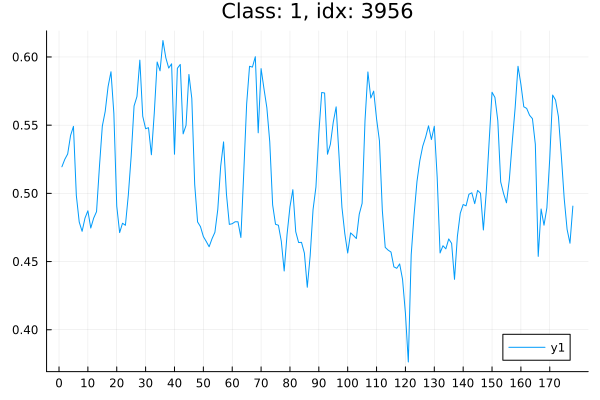

In [119]:
c0_idxs = findall(x -> x .== 0, y_test)
c1_idxs = findall(x -> x .== 1, y_test)
idx = rand(c1_idxs)
plot(X_test[idx, :], title="Class: $((y_test[idx])), idx: $idx", xticks=(0:10:178))

In [42]:
# max_jump=0.3
# class = 1
# interp_sites = collect(50:100)
# instance_idx = 4
# stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMedian; 
#     NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, 
#     mode_range=mode_range, xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, 
#     xvals_enc_it=xvals_enc_it, max_jump=max_jump);


In [126]:
class = 1
interp_sites = collect(50:100)
instance_idx = 1234
stats, p1_ns = any_interpolate_median(fc_ns, class, instance_idx, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)

(Dict(:MAE => 0.025874843406849223, :NN_MAE => 0.025136029515404525), Plots.Plot{Plots.GRBackend}[Plot{Plots.GRBackend() n=4}])

Dict(:MAE => 0.025874843406849223, :NN_MAE => 0.025136029515404525)


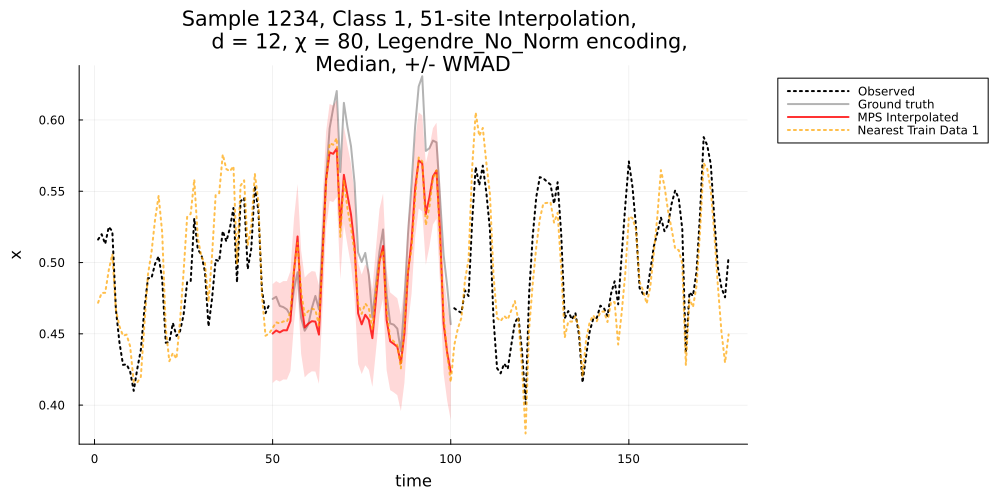

In [127]:
println(stats)
plot(p1_ns...)